## Imports

In [233]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data

In [234]:
df = pd.read_csv('data/honda_car_selling.csv')

In [235]:
df.head()

,Year,kms Driven,Fuel Type,Suspension,Price,Car Model
0,2019,19006 kms,Petrol,Automatic,9.29 Lakh,Honda City V CVT
1,2021,11936 kms,Petrol,Automatic,13.95 Lakh,Honda City ZX CVT
2,2018,29635 kms,Petrol,Automatic,9.95 Lakh,Honda City i-VTEC CVT ZX
3,2020,16163 kms,Petrol,Automatic,13.26 Lakh,Honda City ZX CVT
4,2015,105114 kms,Petrol,Manual,5.68 Lakh,Honda City i VTEC V


In [236]:
df.tail()

,Year,kms Driven,Fuel Type,Suspension,Price,Car Model
994,2007,90000 kms,Petrol,Manual,1.22 Lakh,Honda Civic 1.8 V MT
995,2016,31500 kms,Petrol,Manual,4.25 Lakh,Honda Amaze S i-VTEC
996,2017,39735 kms,Petrol,Manual,5.10 Lakh,Honda Amaze S Petrol
997,2017,36000 kms,Petrol,Manual,6.10 Lakh,Honda City i VTEC S
998,2015,35341 kms,Diesel,Manual,3 Lakh,Honda Amaze S i-Dtech


In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        999 non-null    int64 
 1   kms Driven  999 non-null    object
 2   Fuel Type   999 non-null    object
 3   Suspension  999 non-null    object
 4   Price       999 non-null    object
 5   Car Model   999 non-null    object
dtypes: int64(1), object(5)
memory usage: 47.0+ KB


## Data Processing

In [238]:
# Separating to have only numbers
df[['Kms', 'kms', 'space']] = df["kms Driven"].str.split(' ', expand = True)
df[['space', 'Price (in dollar)', '$']] = df["Price"].str.split(' ', expand = True)

In [239]:
# Drop unnecessary columns
df.drop(['kms', 'kms Driven','space'], axis = 1, inplace = True)
df.drop(['Price', '$'], axis = 1, inplace = True)

In [240]:
# replacing , to .
df['Price (in dollar)'] = df['Price (in dollar)'].str.replace(',', '.')

In [241]:
# object to int/float
df['Price (in dollar)'] = df['Price (in dollar)'].astype(float)
df['Kms'] = df['Kms'].astype(int)

In [242]:
# Converting to dollar
df['Price (in dollar)'] = round(df['Price (in dollar)'] * 1214.37)
df['Price (in dollar)'] = df['Price (in dollar)'].astype(int)

In [243]:
df.head()

,Year,Fuel Type,Suspension,Car Model,Kms,Price (in dollar)
0,2019,Petrol,Automatic,Honda City V CVT,19006,11281
1,2021,Petrol,Automatic,Honda City ZX CVT,11936,16940
2,2018,Petrol,Automatic,Honda City i-VTEC CVT ZX,29635,12083
3,2020,Petrol,Automatic,Honda City ZX CVT,16163,16103
4,2015,Petrol,Manual,Honda City i VTEC V,105114,6898


In [244]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,999.0,2014.717718,3.713756,2000.0,2013.0,2015.0,2017.0,2023.0
Kms,999.0,66076.667668,53104.679244,1425.0,35341.0,59900.0,85287.5,1100000.0
Price (in dollar),999.0,7371.774775,8367.161577,1214.0,4068.0,6254.0,8628.0,115365.0


## Outliers

In [245]:
def out(column):
    # Detection
    Q1 = np.percentile(df[column], 25, interpolation = 'midpoint')

    Q3 = np.percentile(df[column], 75, interpolation = 'midpoint')
    IQR = Q3 - Q1

    upper = np.where(df[column] >= (Q3+1.5*IQR))
    lower = np.where(df[column] <= (Q1-1.5*IQR))

    #Removing the Outliers
    df.drop(upper[0], inplace = True)
    df.drop(lower[0], inplace = True)

out('Price (in dollar)')
out('Kms')

## Visualization

<AxesSubplot:xlabel='Fuel Type', ylabel='count'>

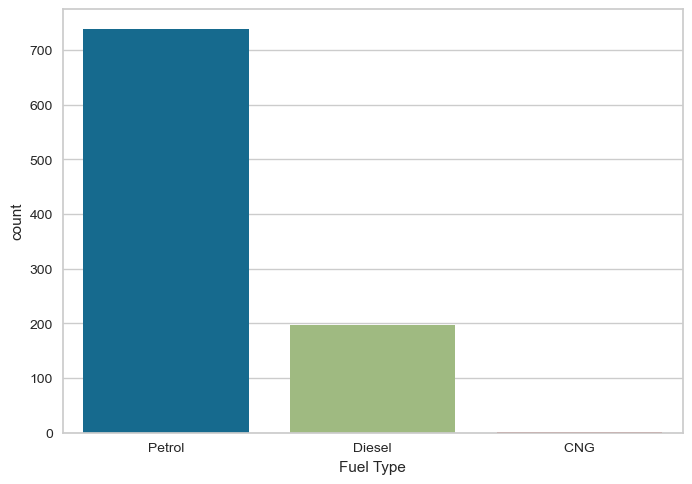

In [246]:
sns.countplot(x = df['Fuel Type'])

<AxesSubplot:xlabel='Suspension', ylabel='count'>

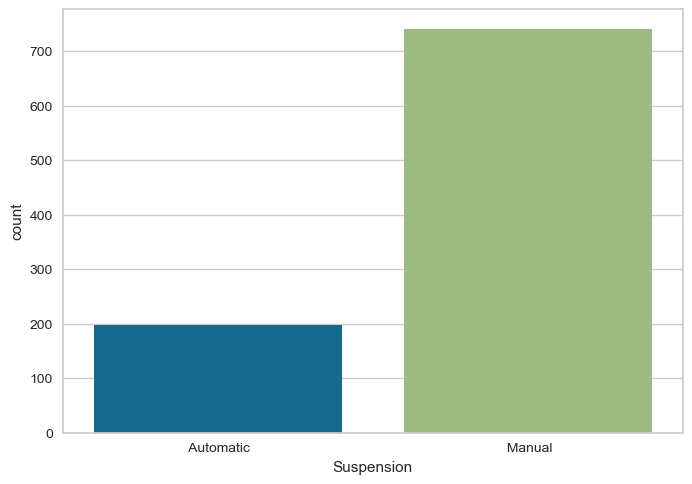

In [247]:
sns.countplot(x = df['Suspension'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, '2000'),
  Text(1, 0, '2004'),
  Text(2, 0, '2005'),
  Text(3, 0, '2006'),
  Text(4, 0, '2007'),
  Text(5, 0, '2008'),
  Text(6, 0, '2009'),
  Text(7, 0, '2010'),
  Text(8, 0, '2011'),
  Text(9, 0, '2012'),
  Text(10, 0, '2013'),
  Text(11, 0, '2014'),
  Text(12, 0, '2015'),
  Text(13, 0, '2016'),
  Text(14, 0, '2017'),
  Text(15, 0, '2018'),
  Text(16, 0, '2019'),
  Text(17, 0, '2020'),
  Text(18, 0, '2021'),
  Text(19, 0, '2022'),
  Text(20, 0, '2023')])

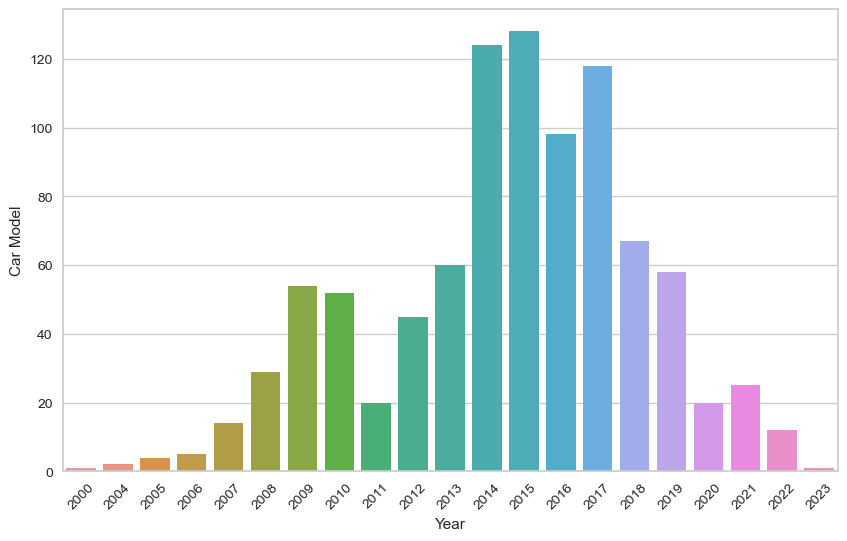

In [248]:
plt.figure(figsize = (10, 6))
sns.countplot(x = df['Year'])
plt.ylabel('Car Model')
plt.xticks(rotation = 45)

Text(0.5, 0, 'R$')

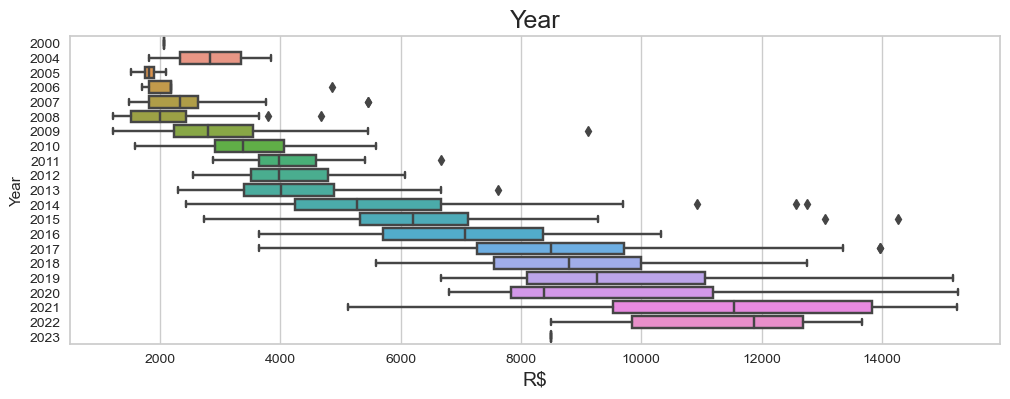

In [249]:
ax = sns.boxplot(x = 'Price (in dollar)', y = 'Year', data = df, orient = 'h')

ax.figure.set_size_inches(12, 4)
ax.set_title('Year', fontsize = 18)
ax.set_xlabel('R$', fontsize = 14)

Text(0, 0.5, 'Price')

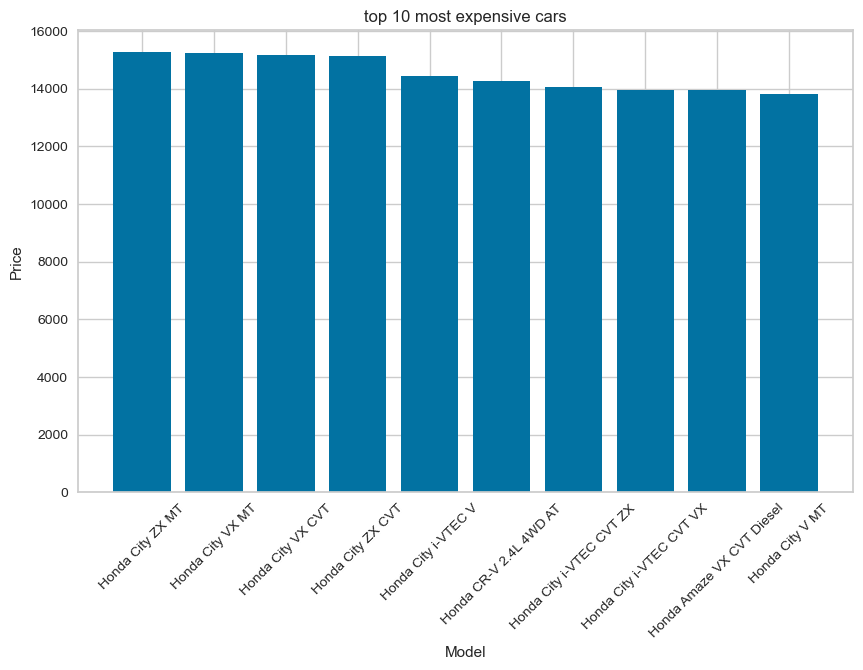

In [250]:
df_sorted = df.sort_values('Price (in dollar)', ascending = False)
top_10 = df_sorted.head(17) # I put 10 and it was 5, then I put 17 and it was 10 haha, I left it like that

plt.figure(figsize = (10, 6))
plt.bar(top_10['Car Model'], top_10['Price (in dollar)'])
plt.xticks(rotation = 45)
plt.title('top 10 most expensive cars')
plt.xlabel('Model')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

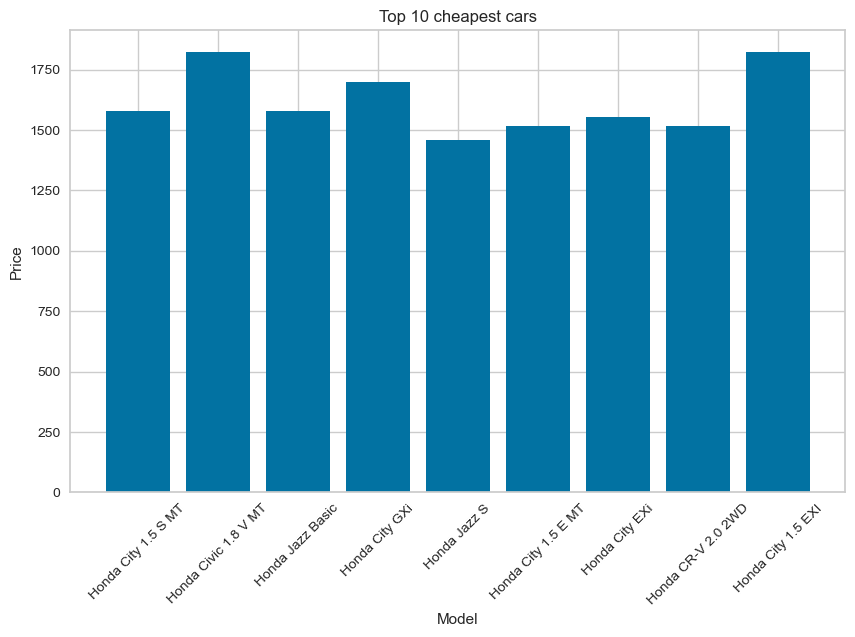

In [251]:
df_sorted = df.sort_values('Price (in dollar)', ascending = True)
top_10 = df_sorted.head(24) # I put 10 and it was 5, then I put 24 and it was 10 haha, I left it like that

plt.figure(figsize = (10, 6))
plt.bar(top_10['Car Model'], top_10['Price (in dollar)'])
plt.xticks(rotation = 45)
plt.title('Top 10 cheapest cars')
plt.xlabel('Model')
plt.ylabel('Price')

## Price classification

### Price < 4000 == C | Price < 7000 == B | Price < 16000 == A

<AxesSubplot:xlabel='Classification', ylabel='Count'>

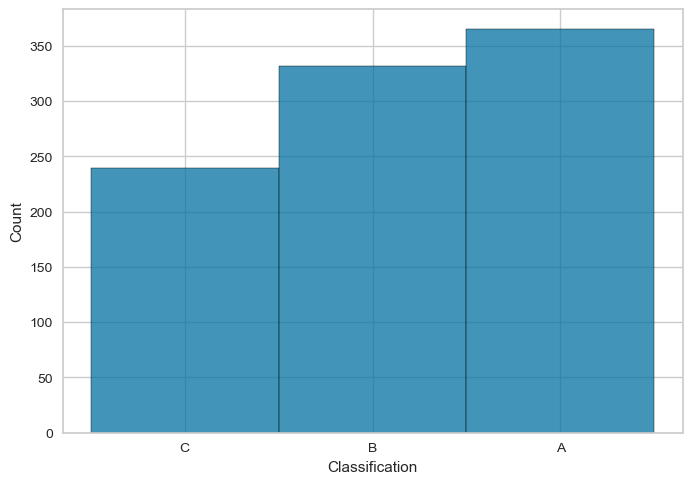

In [252]:
df['Classification'] = pd.cut(df['Price (in dollar)'], bins = [0, 4000, 7000, 16000], labels = ['C', 'B', 'A'])
sns.histplot(x = df['Classification'])

<AxesSubplot:xlabel='Year', ylabel='Count'>

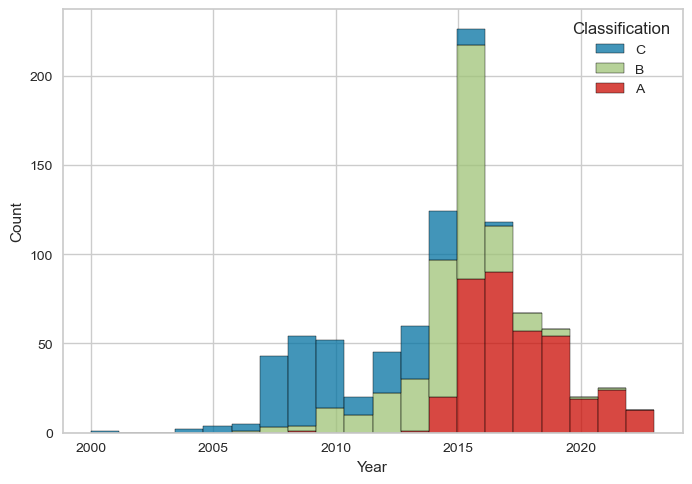

In [253]:
sns.histplot(x = 'Year', hue = df['Classification'], bins = 20, multiple = 'stack', data = df)

<AxesSubplot:xlabel='Classification', ylabel='Count'>

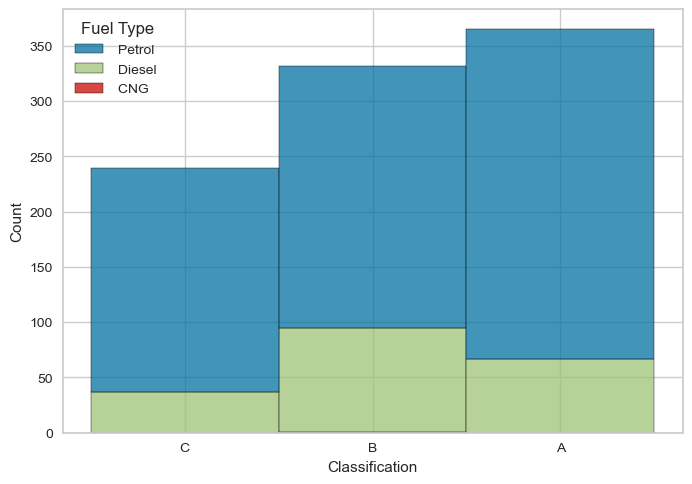

In [254]:
sns.histplot(x = 'Classification', hue = df['Fuel Type'], bins = 4, multiple = 'stack', data = df)

<AxesSubplot:xlabel='Classification', ylabel='Count'>

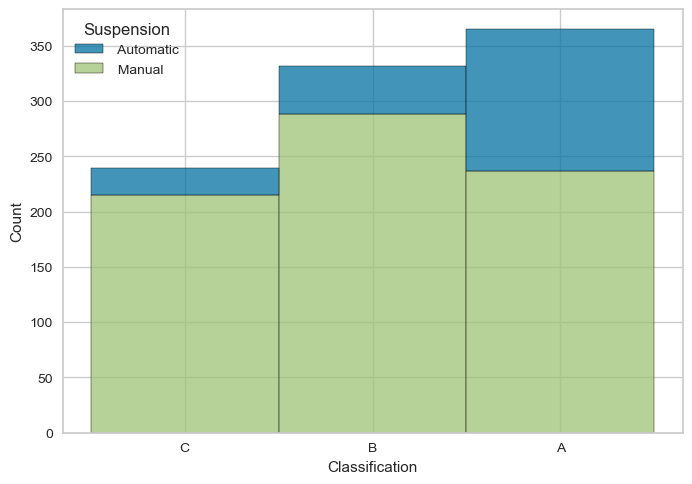

In [255]:
sns.histplot(x = 'Classification', hue = df['Suspension'], bins = 4, multiple = 'stack', data = df)

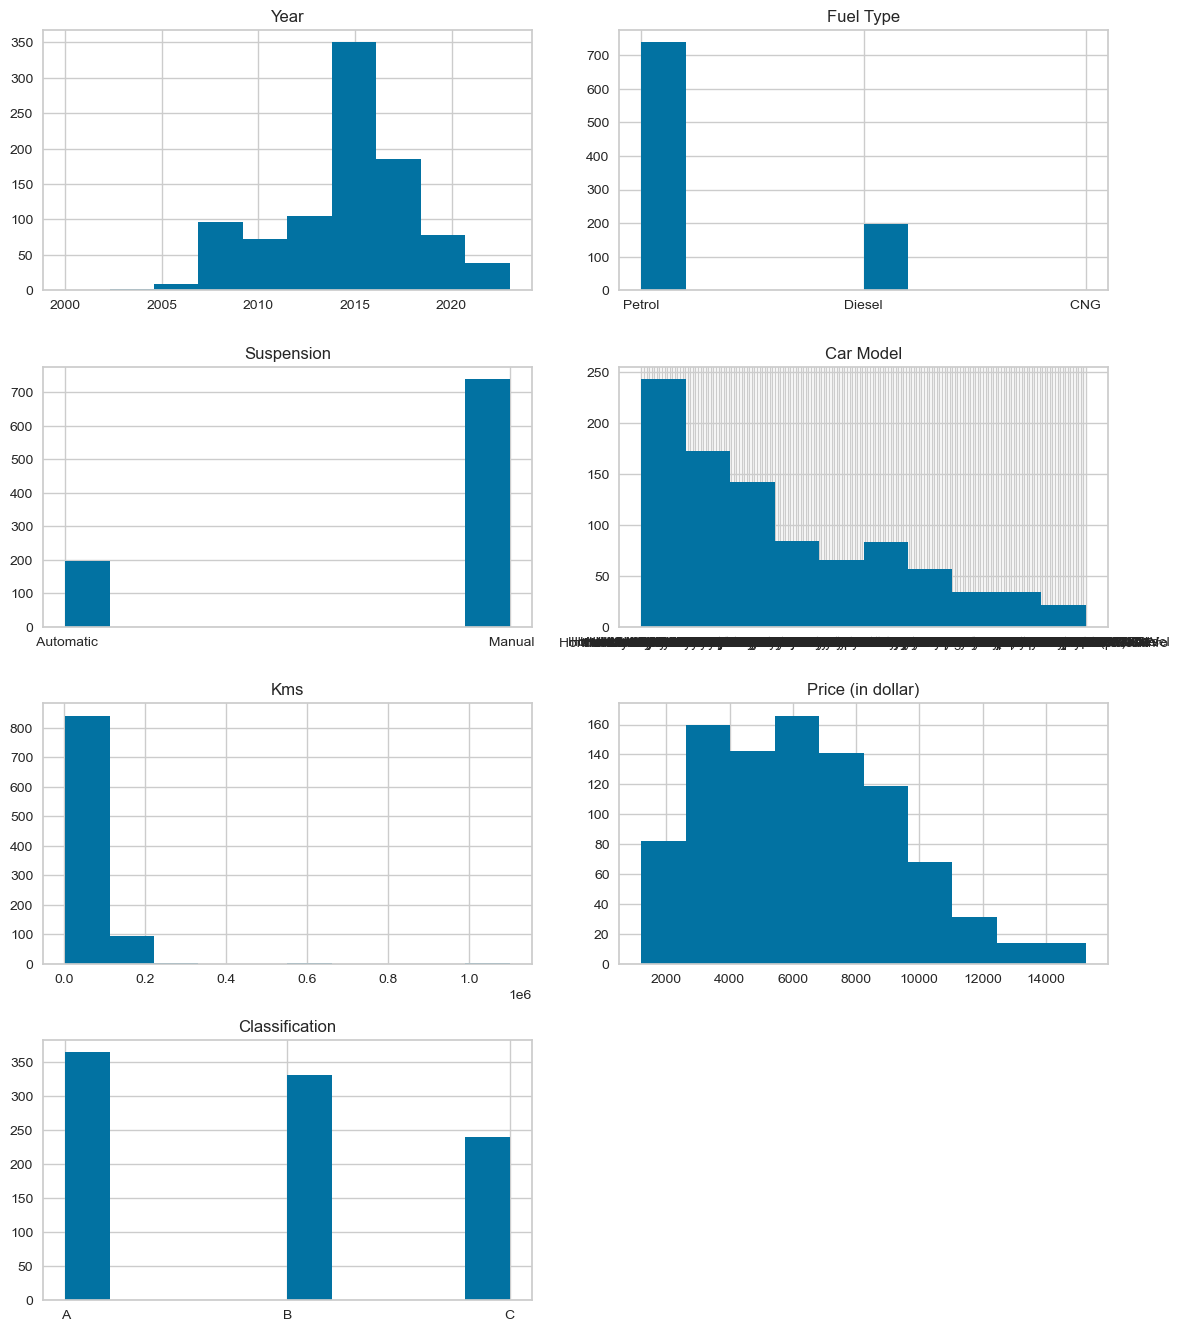

In [256]:
list_columns = list(df.columns)
plt.figure(figsize = (12, 20))
for i in range(len(list_columns)):
    plt.subplot(6, 2, i + 1)
    plt.title(list_columns[i])
    plt.hist(df[list_columns[i]])
    
plt.tight_layout()

## Null Data Processing

In [257]:
from sklearn.preprocessing import OrdinalEncoder

for col in df.columns:
    if df[col].dtype == "object":
        oe = OrdinalEncoder()
        oe.fit(df[[col]])
        df[col] = oe.fit_transform(df[[col]])

## Split Train/Test

In [258]:
from sklearn.model_selection import train_test_split

X = df.drop(['Price (in dollar)', 'Classification'], axis = 1)
y = df['Price (in dollar)']

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Training using GradientBoostingRegressor

In [259]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(random_state = 0)

gb.fit(xtrain, ytrain)
predict = gb.predict(xtest)

## Results

In [260]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

print('R2 Score: ', r2_score(ytest, predict))
print("MSE: ", mean_squared_error(ytest, predict))
print("MAE: ", mean_absolute_error(ytest, predict))

R2 Score:  0.8584065782184015
MSE:  1301966.5837087403
MAE:  817.324458019183


_